# Harry Potter and the Philosopher's Stone.
## Dados e WordCloud do primeiro e segundo capítulo do livro.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Leitura e armazenamento de strings do primeiro e segundo capítulo do livro "Harry Potter and the Philosopher's Stone".

text_to_read = open("C:\wordcloud_alex\harrypotter.txt","r",encoding="utf8")
harrypotter_book = text_to_read.read()
# print(harrypotter_book)

In [3]:
# Função para calcular a frequência de quantas vezes uma palavra aparece nos textos e armazenar os dados em um dicionário (deixando palavras irrelevantes para fora).

def calculate_frequencies(file_contents):
    
    punctuations = '''!()-[]{};:'"\,<>./“”’?@#$%^&—*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "said", "there", "e", "in", "on", ""]
    
    word_count = {}
    words_count = {}

    words_in = file_contents.split()

    for word in words_in:
        for letter in punctuations:
            if letter in word:
                word = word.replace(letter, "")
        if word not in word_count:
            word_count[word] = 0
        if word in word_count:
            word_count[word] += 1

    for words, number in word_count.items():
        if words not in uninteresting_words:
            words_count[words] = number
    
    return words_count

harry_frequency = calculate_frequencies(harrypotter_book)
# print(harry_frequency)

In [4]:
# DataFrame mostrando as Top 50 palavras que aparecem com mais frequência, obtidas pela função calculate_frequencies.

harry_dataframe = pd.DataFrame(harry_frequency.items(), columns=["Word", "Frequency"])
word_dataframe = harry_dataframe.sort_values(["Frequency","Word"], ascending=[False, True])
word_frequency = word_dataframe.head(50)
word_frequency.style.hide_index()

Word,Frequency
Harry,92
He,73
Dudley,49
Dursley,47
I,47
It,38
Dumbledore,36
for,36
Mr,32
Professor,30


In [8]:
word_dataframe.to_csv('word_dataframe.csv', sep=';', index=False)

In [5]:
# Criando o WordCloud

harrypotter = ""
with open("C:\wordcloud_alex\harrypotter.txt", encoding="utf8") as file:
    harrypotter = "".join(file.readlines())

stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "said", "there", "e", "in", "on", ""])

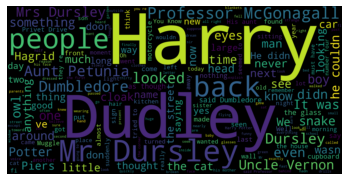

In [6]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(harrypotter)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
wordcloud.to_file("harrypotter_wordcloud.png")